In [326]:
FILE_PATH = "./test-data/data1.json"
ANGLE_ACCURACY = 100

In [327]:
import json
import sys
import numpy as np
from math import *
from matplotlib import pyplot as plt

In [328]:
print("Processing test data file {}".format(FILE_PATH))

Processing test data file ./test-data/data1.json


In [329]:
# Open the json file to read the data
with open(FILE_PATH) as f:
    raw_data = json.load(f)
    img = np.array(raw_data["data"])
    angle = raw_data["angle"]
    width, height = raw_data["width"], raw_data["height"]

Angle (radians): 2.357


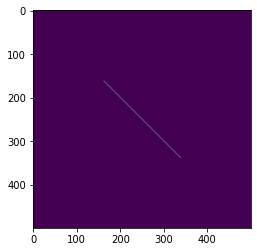

In [330]:
# Show the image
plt.imshow(img)
print("Angle (radians):", round(angle*1000)/1000)

In [331]:
angle_strength = np.zeros(ANGLE_ACCURACY)
for x in range(width):
    for y in range(height):
        theta = atan2(y-height//2, x-width//2)
        
        theta %= pi
        theta = pi - theta - 0.000001
#         if theta > pi:
#             theta -= pi
        angle_strength[int(round( ANGLE_ACCURACY * ((theta/pi)) ))%ANGLE_ACCURACY] += img[x][y]

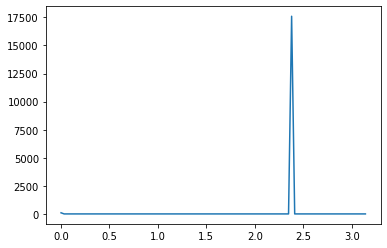

In [332]:
plt.plot(np.linspace(0, pi, num=ANGLE_ACCURACY), angle_strength)

In [334]:
m = max(angle_strength)
detected = pi * np.where(angle_strength == m)[0]/ANGLE_ACCURACY
print("Detected Angle: {}".format(detected))

Detected Angle: [2.35619449]
